In [1]:
import sys
sys.path.append('../')

from main import *

### Creation of the linear model

In [2]:
momo = MODEL()

momo.creat_linear(4)

momo.enzymes.add_to_all_reaction()
momo.parameters.add_enzymes()

momo.parameters.add_externals()

momo.elasticity.s.half_satured()

Model created 
 
To add metabolite, use .metabolites.add_meta 
To add reaction,   use .reactions.add_reaction
Model created 
 
To add metabolite, use .metabolites.add_meta 
To add reaction,   use .reactions.add_reaction


In [3]:
momo.N_without_ext

,reaction_0,reaction_1,reaction_2
meta_1,1,-1,0
meta_2,0,1,-1


In [4]:
momo.elasticity.s.df

,meta_1,meta_2
reaction_0,-0.5,-0.0
reaction_1,0.5,-0.5
reaction_2,-0.0,0.5


In [5]:
momo.elasticity.p.df

,Temperature,enzyme_reaction_0_para,enzyme_reaction_1_para,enzyme_reaction_2_para,meta_0,meta_3
reaction_0,0,1.0,0.0,0.0,0.5,-0.0
reaction_1,0,0.0,1.0,0.0,-0.0,-0.0
reaction_2,0,0.0,0.0,1.0,-0.0,-0.5


In [6]:
momo.frequency_omega = 1.0

In [7]:
momo.frequency_omega

1.0

In [8]:
momo.Jacobian

,meta_1,meta_2
meta_1,-1.0-1.0j,0.5+0.0j
meta_2,0.5+0.0j,-1.0-1.0j


In [9]:
momo.R

,Temperature,enzyme_reaction_0_para,enzyme_reaction_1_para,enzyme_reaction_2_para,meta_0_para,meta_3_para
meta_1,0.0+0.0j,0.430769-0.553846j,-0.461538+0.307692j,0.030769+0.246154j,0.0+0.0j,0.0+0.0j
meta_2,0.0+0.0j,-0.030769-0.246154j,0.461538-0.307692j,-0.430769+0.553846j,-0.0+0.0j,-0.0+0.0j
reaction_0,0.0+0.0j,0.784615+0.276923j,0.230769-0.153846j,-0.015385-0.123077j,0.0+0.0j,0.0+0.0j
reaction_1,0.0+0.0j,0.230769-0.153846j,0.538462+0.307692j,0.230769-0.153846j,0.0+0.0j,0.0+0.0j
reaction_2,0.0+0.0j,-0.015385-0.123077j,0.230769-0.153846j,0.784615+0.276923j,0.0+0.0j,0.0+0.0j


In [13]:
a = momo.covariance

In [11]:
T = 10.
n = 1000

Dt = [i*T/n for i in range(n+1)]

c_bis = [[] for i in range(momo.temporal_R_s_p().shape[0])]
v_bis = [[] for i in range(momo.temporal_R_v_p().shape[0])]


delta_p = np.array([[0.],
                [0.],
                [0.],
                [1.],
                [0.],
                [0.]])

In [20]:
momo.parameters.df

,Mean values,Standard deviation
Temperature,273.15,1.0
enzyme_reaction_0_para,1.0,1.0
enzyme_reaction_1_para,1.0,1.0
enzyme_reaction_2_para,1.0,1.0
meta_0_para,1.0,1.0
meta_3_para,1.0,1.0


In [12]:
compteur = 0
for dt in Dt :
    delta_c = np.dot(momo.temporal_R_s_p(dt), delta_p)
    for i in range(len(c_bis)) :
        c_bis[i].append(delta_c[i][0])

    
    delta_v = np.dot(momo.temporal_R_v_p(dt), delta_p)
    for  i, flux in enumerate(v_bis) :
        flux.append(delta_v[i][0])



KeyboardInterrupt: 

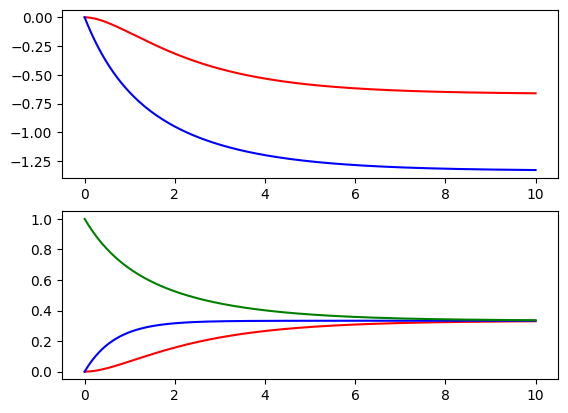

In [ ]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(2)

ax1.plot(Dt, c_bis[0], "r")
ax1.plot(Dt, c_bis[1], "b")

ax2.plot(Dt, v_bis[0], "r")
ax2.plot(Dt, v_bis[1], "b")
ax2.plot(Dt, v_bis[2], "g")